In [2]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# option so we can always see all columns
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_excel('real_estate_withheaders.xls')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [295]:
#if categories were dominant then i would think the chi squared test 

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


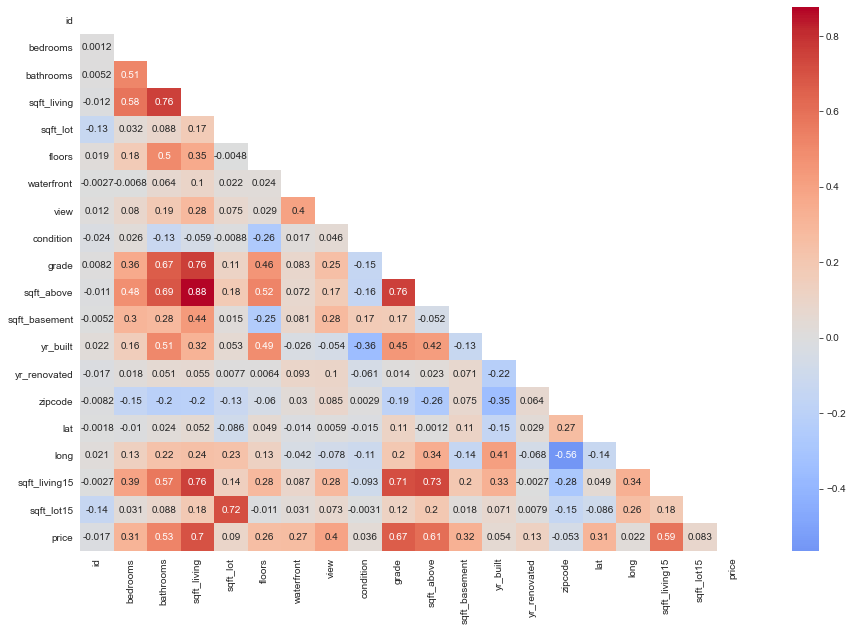

In [5]:
fig, ax = plt.subplots(figsize=(15,10))

mask=np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', center=0)

plt.show()

In [297]:
#corr matrix with absolute numbers 
corr_matrix =df.corr().abs()

In [298]:
price_impact = corr_matrix['price']

In [299]:
price_impact.sort_values(ascending=True)

id               0.016772
long             0.022036
condition        0.036056
zipcode          0.053402
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [300]:
df=df.drop(columns=['id','long','sqft_above'])

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_basement  21597 non-null  int64         
 11  yr_built       21597 non-null  int64         
 12  yr_renovated   21597 non-null  int64         
 13  zipcode        21597 non-null  int64         
 14  lat            21597 non-null  float64       
 15  sqft_living15  2159

# feature engineering 

In [302]:
df['date'][5]

Timestamp('2014-05-12 00:00:00')

In [303]:
df['month']=pd.DatetimeIndex(df['date']).month
#df['quarter']

In [304]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,month
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,1340,5650,221900,10
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,1690,7639,538000,12
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,2720,8062,180000,2
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,1360,5000,604000,12
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,1800,7503,510000,2


In [305]:
#seattle - its very grey and rainy in the winter - summer price bubble ? 

def season(x):
    if x<4:
        return 'winter'
    elif x<10:
        return 'summer'
    else:
        return 'winter'

In [306]:
df['season']=list(map(season, df['month']))

In [307]:
df=df.drop(columns=['date','month'])

In [308]:
#year built - more useful to know the age of the property - bucketed into age groups 
#- 3 clusters, pre 1930, pre 1980 and post 1980
df['yr_built'][1]

1951

In [309]:
def era(x):
    if x<1938:
        return 'prewar'
    elif x<1980:
        return 'the_rest'
    else:
        return 'new_homes'

df['built_era']=list(map(era, df['yr_built']))

In [310]:
df['age']=2015-df['yr_built']

In [311]:
df=df.drop(columns=['yr_built'])

In [312]:
#other columns - yr renovated, view, waterfront, basement 

In [313]:
round((df['yr_renovated']!=0).sum()/sum(df['yr_renovated'].value_counts())*100,2)

4.23

In [314]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [315]:
def boolean(x):
    if x == 0:
        n = 0
    elif x > 0:
        n = 1
    return n
#generic apply to any column we want to turn into a true false 
#or use astype(bool)
#maybe combine the era with the yr renovated - to classify the value of the renovation - sians homework 

In [316]:
df['renovated']=df['yr_renovated'].apply(boolean).astype('bool') #new
df['view']=df['view'].apply(boolean).astype('bool')#overwrite
df['sqft_basement']=df['sqft_basement'].apply(boolean).astype('bool')#overwrite

In [317]:
for c in df.columns.tolist():
    print(c, len(df[c].unique()))

bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 2
condition 5
grade 11
sqft_basement 2
yr_renovated 70
zipcode 70
lat 5033
sqft_living15 777
sqft_lot15 8682
price 3622
season 2
built_era 3
age 116
renovated 2


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  bool   
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  bool   
 10  yr_renovated   21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  price          21597 non-null  int64  
 16  season         21597 non-null  object 
 17  built_era      21597 non-null  object 
 18  age   

<AxesSubplot:xlabel='season', ylabel='count'>

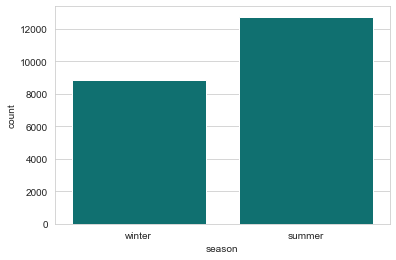

In [319]:
sns.countplot(x=df['season'], color="teal")

<AxesSubplot:xlabel='built_era', ylabel='count'>

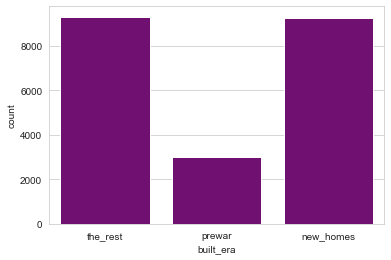

In [320]:
sns.countplot(x=df['built_era'], color="purple")

# Correlation and distribution of all numeric columns 

In [321]:
numerical= df.select_dtypes(include='number')

In [322]:
numerical.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,age
0,3,1.00,1180,5650,1.0,0,3,7,0,98178,47.5112,1340,5650,221900,60
1,3,2.25,2570,7242,2.0,0,3,7,1991,98125,47.7210,1690,7639,538000,64
2,2,1.00,770,10000,1.0,0,3,6,0,98028,47.7379,2720,8062,180000,82
3,4,3.00,1960,5000,1.0,0,5,7,0,98136,47.5208,1360,5000,604000,50
4,3,2.00,1680,8080,1.0,0,3,8,0,98074,47.6168,1800,7503,510000,28


In [323]:
numerical.corr(method='pearson').sort_values(['price'], ascending=False)['price'][1:10]

sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
Name: price, dtype: float64

In [324]:
#pd.plotting.scatter_matrix(numerical, alpha=0.2, figsize=(16,16), grid=True, diagonal='kde');

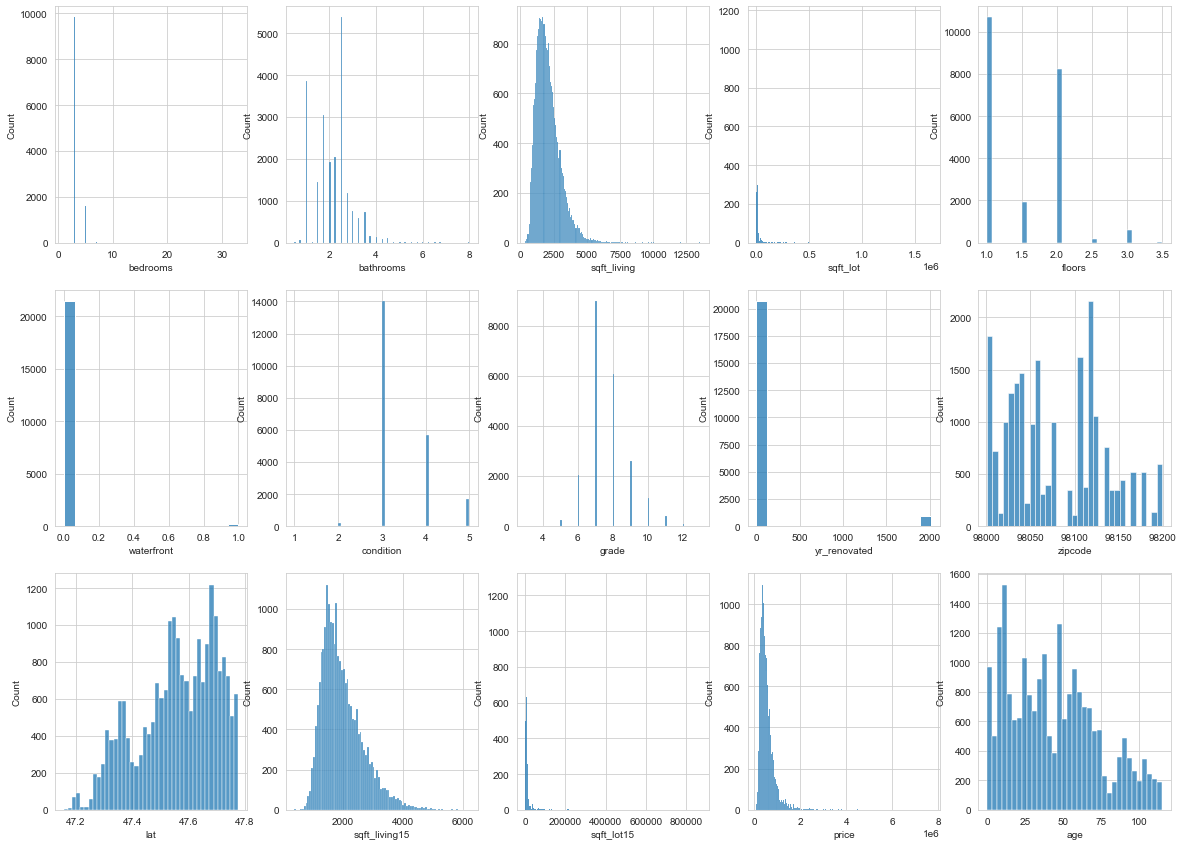

In [325]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(numerical[column]);

## in depth questions 

In [326]:
#is there a summer price hike ? 
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [327]:
df_waterfront=df[df['waterfront'] == 1]


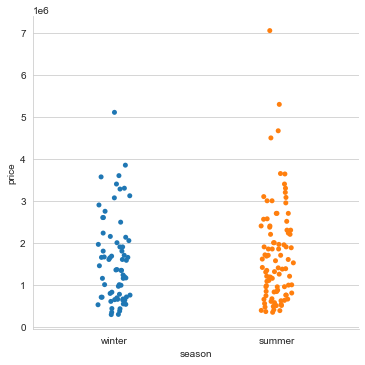

In [328]:
sns.catplot(x="season", y="price", data=df_waterfront)

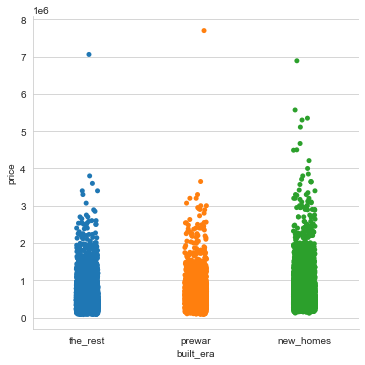

In [329]:
#does era have a strong impact on price ? 
sns.catplot(x="built_era", y="price", data=df)

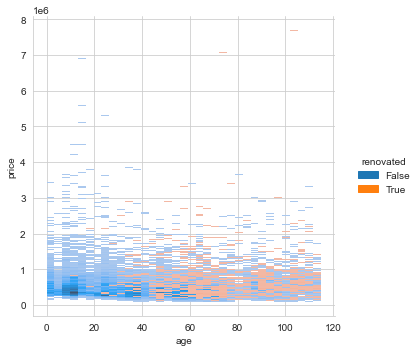

In [330]:
#what about age 

sns.displot(y="price", x="age",hue='renovated',data=df);

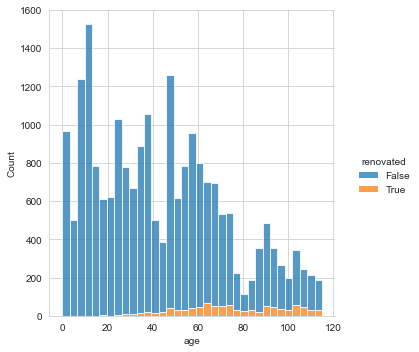

In [331]:
#dive into age and if renovated 
sns.displot(x="age",hue='renovated',data=df,multiple="stack");

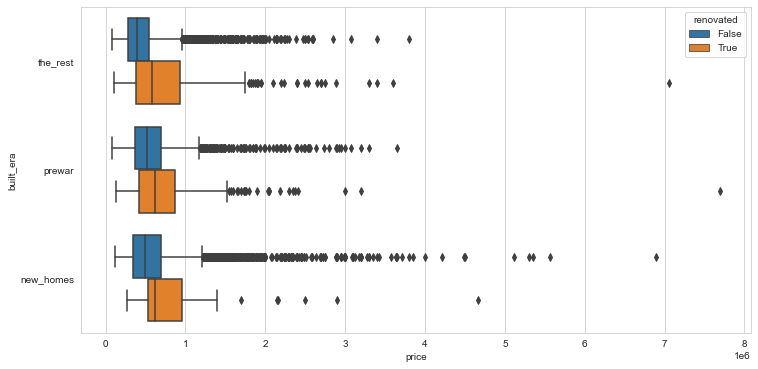

In [332]:
#sians homework, analyse era against renovated y/n 
plt.figure(figsize=(12,6)) 
sns.boxplot(y="built_era", x="price", hue="renovated",data=df);

# Chi squared approach  - looking at correlations between categories

In [333]:
df['price_group'] = (df['price'] / 200000).apply(np.ceil).astype('object')

In [334]:
df['price_group'].value_counts()

2.0     7988
3.0     6517
4.0     3311
5.0     1485
1.0      838
6.0      480
7.0      363
8.0      189
9.0      136
10.0      92
12.0      48
11.0      35
13.0      33
15.0      22
14.0      15
16.0      13
17.0       9
19.0       7
18.0       3
20.0       2
23.0       2
27.0       2
22.0       1
24.0       1
26.0       1
28.0       1
35.0       1
36.0       1
39.0       1
Name: price_group, dtype: int64

In [335]:
df_filter_price = df[df['price_group'] < 19]

In [336]:
df_filter_price.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,season,built_era,age,renovated,price_group
0,3,1.00,1180,5650,1.0,0,False,3,7,False,0,98178,47.5112,1340,5650,221900,winter,the_rest,60,False,2.0
1,3,2.25,2570,7242,2.0,0,False,3,7,True,1991,98125,47.7210,1690,7639,538000,winter,the_rest,64,True,3.0
2,2,1.00,770,10000,1.0,0,False,3,6,False,0,98028,47.7379,2720,8062,180000,winter,prewar,82,False,1.0
3,4,3.00,1960,5000,1.0,0,False,5,7,True,0,98136,47.5208,1360,5000,604000,winter,the_rest,50,False,4.0
4,3,2.00,1680,8080,1.0,0,False,3,8,False,0,98074,47.6168,1800,7503,510000,winter,new_homes,28,False,3.0


In [337]:
cat = df_filter_price.select_dtypes(exclude='number')

In [338]:
cat.head()

,view,sqft_basement,season,built_era,renovated,price_group
0,False,False,winter,the_rest,False,2.0
1,False,True,winter,the_rest,True,3.0
2,False,False,winter,prewar,False,1.0
3,False,True,winter,the_rest,False,4.0
4,False,False,winter,new_homes,False,3.0


In [339]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   view           21577 non-null  bool  
 1   sqft_basement  21577 non-null  bool  
 2   season         21577 non-null  object
 3   built_era      21577 non-null  object
 4   renovated      21577 non-null  bool  
 5   price_group    21577 non-null  object
dtypes: bool(3), object(3)
memory usage: 737.5+ KB


In [340]:
contingency = pd.crosstab(cat.price_group, [cat.built_era, cat.renovated, cat.view, cat.season, cat.sqft_basement])

In [341]:
contingency

built_era     new_homes                                                      \
renovated         False                                               True    
view              False                     True                      False   
season           summer       winter       summer       winter       summer   
sqft_basement     False True   False True   False True   False True   False   
price_group                                                                   
1.0                  39    13     39     8      0     0      0     0      0   
2.0                1403   377   1047   301     17    12     17     3      2   
3.0                1210   444    740   281     51    39     24    34      6   
4.0                 726   198    422   119     43    36     34    22      3   
5.0                 317    83    199    56     28    35     20    17      1   
6.0                  81    41     49    28     14    29      9    13      0   
7.0                  49    26     20    21     11    32      6    22      0   
8.0                  21    14     22    11      6    14      3    12      0   
9.0                  16     8     14     6      5    10      4    11      0   
10.0                 10     3     10     5      5     7      4     9      0   
11.0                  4     0      0     1      0     1      1     3      0   
12.0                  4     5      2     0      2     7      1     5      0   
13.0                  1     2      0     0      2     5      1     1      0   
14.0                  1     0      2     0      0     2      1     2      0   
15.0                  1     2      0     1      0     5      2     2      0   
16.0                  1     0      0     0      2     4      1     1      0   
17.0                  1     0      0     0      0     3      0     1      0   
18.0                  0     0      1     0      0     0      0     1      0   

built_era                                            prewar               \
renovated                                             False                
view                              True                False                
season              winter       summer       winter summer       winter   
sqft_basement True   False True   False True   False  False True   False   
price_group                                                                
1.0               0      0     0      0     0      0     57     6     58   
2.0               1      2     1      0     0      0    247   102    184   
3.0               0      2     2      0     0      0    233   255    181   
4.0               0      1     0      0     0      0    101   178     78   
5.0               1      2     1      1     0      0     36    76     17   
6.0               0      0     1      0     0      0      3    15      6   
7.0               0      0     0      1     0      0      7    16      1   
8.0               0      0     0      0     0      0      2     7      2   
9.0               0      0     0      0     1      0      2     1      0   
10.0              0      0     0      0     0      0      0     2      0   
11.0              0      0     0      0     1      1      0     0      1   
12.0              0      0     0      0     0      0      0     1      0   
13.0              0      1     0      0     0      0      0     2      0   
14.0              0      0     0      0     0      0      0     0      0   
15.0              0      0     0      0     1      0      0     2      0   
16.0              0      0     0      0     0      0      0     0      0   
17.0              0      0     0      0     0      0      0     0      0   
18.0              0      0     0      0     0      0      0     0      0   

built_era                                                                \
renovated                                      True                       
view                 True                      False                      
season              summer       winter       summer 

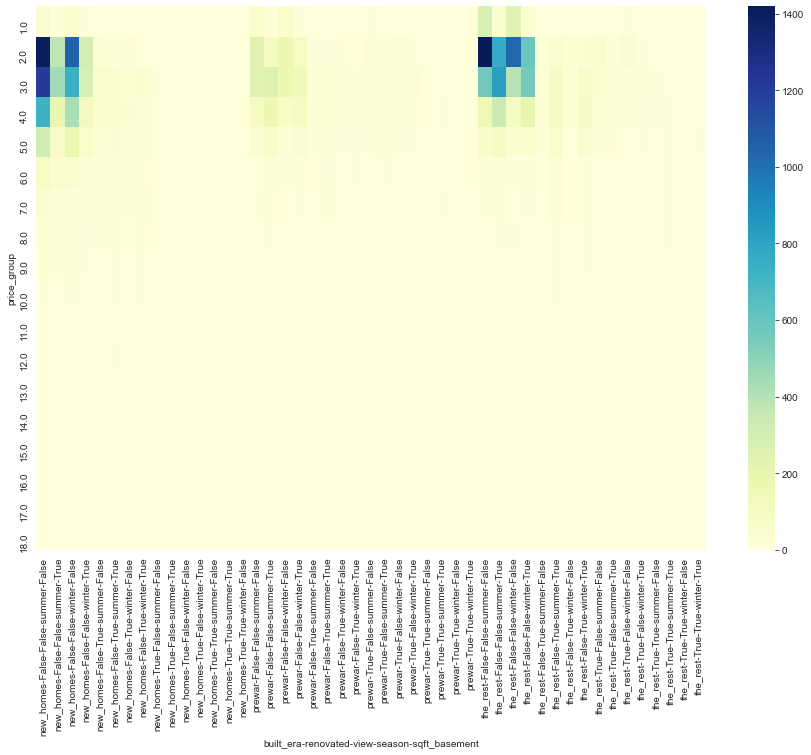

In [342]:
plt.figure(figsize = (15, 10))
sns.heatmap(contingency, cmap='YlGnBu');

In [343]:
from scipy.stats import chi2_contingency, chi2

## Take 2 columns and look for independence

## Ho - these variables have no association or correlation
## Ha - these variables are associated or have correlation

In [344]:
contingency2 = pd.crosstab(cat.renovated, cat.built_era)

In [345]:
contingency2

built_era,new_homes,prewar,the_rest
renovated,,,
False,9220,2608,8838
True,33,404,474


## Chi stats - 'c', 
## p value - in general if <0.05 - evidence of significant relationship

In [346]:
c, p, dof, expected = chi2_contingency(contingency2, correction=False)

In [347]:
p

2.312091527679248e-215

In [348]:
if p <= 0.05:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')

dependent (reject H0)


## consider dropping either of these fields because of high correlation

In [349]:
# test statistic itself
probability = 0.95
critical_val = chi2.ppf(probability, dof)
if abs(c) >= critical_val:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')


dependent (reject H0)


In [350]:
c

988.4352849111934

In [351]:
cat = df.select_dtypes(exclude='number')

In [352]:
X_cat = cat.drop(columns='price_group')

In [358]:
X_cat.head()

,view,sqft_basement,renovated,season_winter,built_era_prewar,built_era_the_rest
0,False,False,False,1,0,1
1,False,True,True,1,0,1
2,False,False,False,1,1,0
3,False,True,False,1,0,1
4,False,False,False,1,0,0


In [354]:
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [355]:
X_num = df.select_dtypes(include='number')

In [356]:
X_cat.shape

(21597, 6)

In [357]:
X_num.shape

(21597, 15)

In [370]:
data = pd.concat([X_cat, X_num], axis=1)

In [371]:
data.head()

,view,sqft_basement,renovated,season_winter,built_era_prewar,built_era_the_rest,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,age
0,False,False,False,1,0,1,3,1.00,1180,5650,1.0,0,3,7,0,98178,47.5112,1340,5650,221900,60
1,False,True,True,1,0,1,3,2.25,2570,7242,2.0,0,3,7,1991,98125,47.7210,1690,7639,538000,64
2,False,False,False,1,1,0,2,1.00,770,10000,1.0,0,3,6,0,98028,47.7379,2720,8062,180000,82
3,False,True,False,1,0,1,4,3.00,1960,5000,1.0,0,5,7,0,98136,47.5208,1360,5000,604000,50
4,False,False,False,1,0,0,3,2.00,1680,8080,1.0,0,3,8,0,98074,47.6168,1800,7503,510000,28


In [372]:
data.shape

(21597, 21)

In [375]:
X = data.drop(columns='price')
y = data['price']

In [373]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [374]:
tree = RandomForestRegressor()

In [377]:
tree.fit(X, y)

RandomForestRegressor()

In [378]:
tree.feature_importances_

array([7.85195806e-03, 2.20573753e-03, 8.25322369e-04, 1.85675945e-03,
       2.37346415e-04, 6.39078266e-04, 4.28189483e-03, 1.22540011e-02,
       2.78203390e-01, 2.06499981e-02, 3.12438097e-03, 3.84047139e-02,
       4.48695024e-03, 3.22523701e-01, 2.53497694e-03, 4.22934628e-02,
       1.57676236e-01, 3.35060237e-02, 1.89084769e-02, 4.75355912e-02])

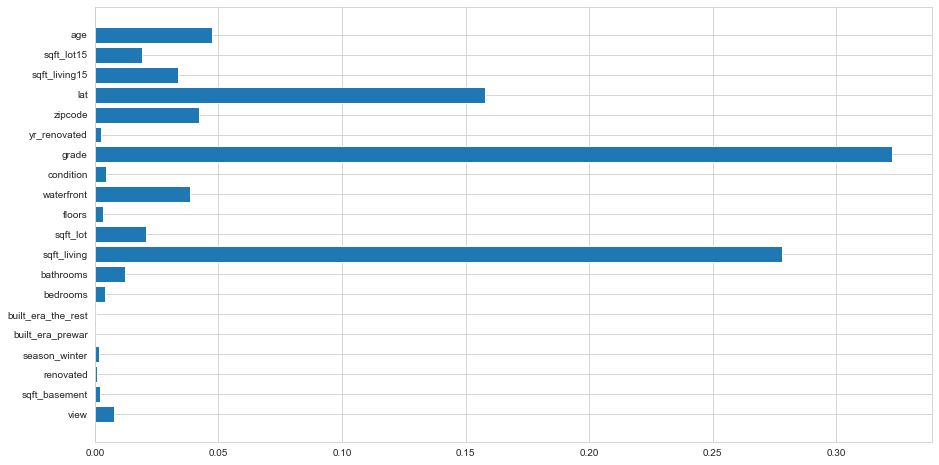

In [392]:
plt.figure(figsize=(15, 8))
plt.barh(X.columns, tree.feature_importances_);

In [389]:
sorted_col = tree.feature_importances_.argsort()

Text(0.5, 0, 'RF feature importance')

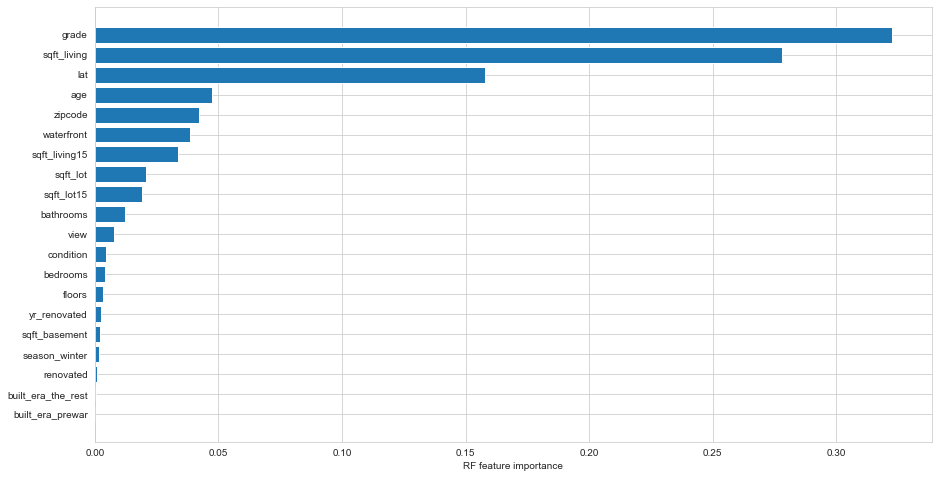

In [391]:
plt.barh(X.columns[sorted_col], tree.feature_importances_[sorted_col])
plt.xlabel('RF feature importance')